# Exploration of Peptide Trajectory

In this notebook, we open and explore an all-atom MD simulation of a peptide system in explicit solvent using `MDAnalysis` python pachage. In the following notebooks this is done using helper function from `helper.py`

Trajectory: 50 ns with 500 ps timestep
System: 100 short disordered peptides in water and ion solution (water and ions are not present in the .xtc file)

In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

### Loading the trajectory

In [3]:
u = mda.Universe('../data/initial.pdb','../data/pbc.md.xtc')

In [23]:
nframes = u.trajectory.n_frames
dt = u.trajectory.dt
units = u.trajectory.units
protein = u.select_atoms("protein and not resname ACE and not resname NME") #contains only protein information; here is the same as all atoms
nchains = u.select_atoms('resname ACE and name CH3').n_atoms
natoms = protein.n_atoms
natoms_perchain = int(natoms/nchains)
residues = np.unique(u.residues.resnames)
box = u.dimensions

In [28]:
print("Trjectory of",nframes,"frames of", u.trajectory.totaltime, units['time'], "with a timestep of", dt, units['time'])
print(f"Box size: {box[0]} {box[1]} {box[2]} Ang")
print("There is", natoms,"total atoms (", nchains,"chains each of",natoms_perchain,"atoms )")
print("Unique residues ", residues)

Trjectory of 101 frames of 50000.0 ps with a timestep of 500.0 ps
Box size: 57.0 57.0 116.910400390625 Ang
There is 9400 total atoms ( 100 chains each of 94 atoms )
Unique residues  ['ACE' 'GLN' 'GLY' 'NME' 'TYR']


In [6]:
chains = [protein[i*natoms_perchain:(i+1)*natoms_perchain] for i in range(nchains)]

In [7]:
allresids = protein.residues
nres = int(len(allresids)/nchains)
chainresids = [allresids[i*nres:(i+1)*nres] for i in range(nchains)]

In [8]:
times = np.arange(0,u.trajectory.totaltime+dt,dt)

### Looking at the movement of some peptides
- First we will calculate center of mass of each peptides in time
- Next we will extract positions of peptide with index 50 and see how it moved in 3 directions. We can see that in this time scale it doesn't move much, espetially in the z direction. But we can clearly see the effect of periodic boundary conditions when the peptide 'jumps' form one side to another in x or y direction
- Finally, we will look at center of mass positions of all peptides to get a feel of the slab geometry

In [70]:
chains_com = np.zeros((nchains,nframes,3))
for i,frame in enumerate(u.trajectory):
    for j,chain in enumerate(chains):
        chains_com[j,i] = chain.center_of_geometry()

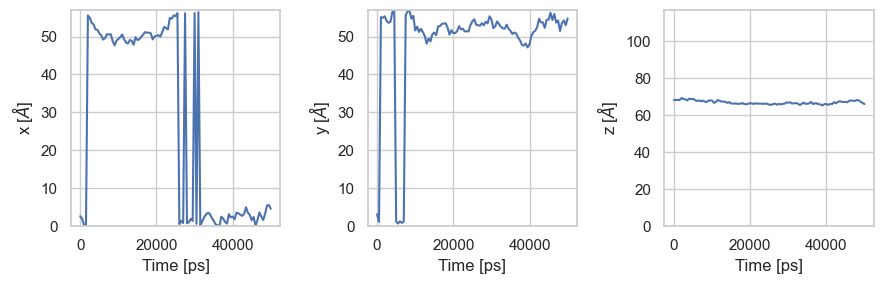

In [72]:
labels = ['x','y','z']
chain_id = 50

fig,ax = plt.subplots(1,3,figsize=(9,3))
for i in range(3):
    ax[i].plot(times,chains_com[chain_id].T[i],label=labels[i])
    ax[i].set_ylim([0,box[i]])
    ax[i].set_ylabel(f'{labels[i]} [$\AA$]') 
    ax[i].set_xlabel('Time [ps]')
plt.tight_layout()

#### Looking at the movement of peptides in z axis
We will extract positions of all peptides and look how they are positioned in a slab geometry

Each color represents a different peptide. We see that they don't travel much in this timescale and never detach from the main condensate body. But even at 50 ns sample we already see how the system equilibrates into a more dense composition from this simple analysis

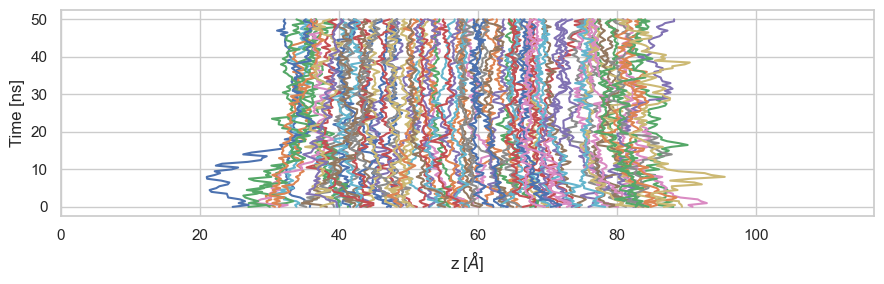

In [84]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
[ax.plot(x[:,2],times/1000) for i,x in enumerate(chains_com)]
ax.set_xlim([0,box[2]])
ax.set_xlabel('z [$\AA$]')
ax.set_ylabel('Time [ns]')
plt.tight_layout()